In [29]:
!pip install ucimlrepo

In [30]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [31]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
diabetes_130_us_hospitals_for_years_1999_2008 = fetch_ucirepo(id=296)

# data (as pandas dataframes)
X = diabetes_130_us_hospitals_for_years_1999_2008.data.features
y = diabetes_130_us_hospitals_for_years_1999_2008.data.targets

X.columns

/usr/local/lib/python3.10/dist-packages/ucimlrepo/fetch.py:97: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


Index(['race', 'gender', 'age', 'weight', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'payer_code', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed'],
      dtype='object')

In [32]:
# Encode categorical labels into integers
enc = OrdinalEncoder()
transformed = enc.fit_transform(y)
y = transformed.flatten()
print(y)

[2. 1. 2. ... 2. 2. 2.]


In [33]:
# One hot encode sample dataset
# We use one hot encoding instead of categorical numbers because we don't want to introduce an ordinal relationship
# For example, we don't want to assign certain races, genders, etc. a higher value than one another
Xsample = pd.DataFrame()
enc = OneHotEncoder()

for x in ['race', 'gender', 'age', 'admission_type_id', 'discharge_disposition_id','admission_source_id',
 'diag_1','diag_2','diag_3','number_diagnoses','max_glu_serum','A1Cresult','metformin',
 'repaglinide','glimepiride','acarbose','rosiglitazone','pioglitazone','glipizide','diabetesMed','change','insulin']:
  transformed = enc.fit_transform(X[[x]].to_numpy().reshape(-1, 1))
  Xsample.reset_index(drop=True, inplace=True)
  temp = pd.DataFrame(transformed.toarray())
  temp.reset_index(drop=True, inplace=True)
  temp.columns = enc.get_feature_names_out([x])
  Xsample = pd.concat([Xsample, temp],axis=1)

Xsample.head(5)

,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,race_nan,gender_Female,gender_Male,gender_Unknown/Invalid,age_[0-10),...,glipizide_Steady,glipizide_Up,diabetesMed_No,diabetesMed_Yes,change_Ch,change_No,insulin_Down,insulin_No,insulin_Steady,insulin_Up
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


In [34]:
# numericals = X[['time_in_hospital','num_lab_procedures','num_procedures','num_medications','number_outpatient','number_emergency','number_inpatient']]
# Xsample = X[['race', 'gender', 'age', 'admission_type_id', 'discharge_disposition_id','admission_source_id','payer_code',
#  'medical_specialty','diag_1','diag_2','diag_3','number_diagnoses','max_glu_serum','A1Cresult','metformin',
#  'repaglinide','glimepiride','acarbose','rosiglitazone','pioglitazone','glipizide','diabetesMed','change','insulin']]
# Xsample = pd.concat([Xsample, numericals],axis=1)
# Xsample.head(5)

In [35]:
 # Train test split
 X_train, X_test, y_train, y_test = train_test_split(Xsample, y, test_size=0.33, random_state=42)

In [36]:
RFC = RandomForestClassifier(n_estimators=50, max_depth=10).fit(X_train, y_train)

In [37]:
RFC.score(X_test, y_test)

0.5383080725367001

In [38]:
# # Original values took way too long to run,
# estimators = range(50, 75, 5)       # trees, 50 - 70 by 5s
# depths = range(7, 11)                # max depth of tree, 7 - 11
# # func = ("gini", "entropy", "log_loss")    # function
# min_splits = range(2, 9, 2)              # min samples to split a node, 2 - 8 by 2s
# parameters = {'n_estimators':estimators, 'max_depth':depths, 'min_samples_split':min_splits}

# RFC = RandomForestClassifier()
# clf = GridSearchCV(RFC, parameters).fit(X_train, y_train)

In [42]:
depths = range(5, 21)
scores = []
for x in depths:
  RFC = RandomForestClassifier(n_estimators=50, max_depth=10).fit(X_train, y_train)
  scores.append(RFC.score(X_test, y_test))

Text(0.5, 1.0, 'Random Forest: Depth vs Score')

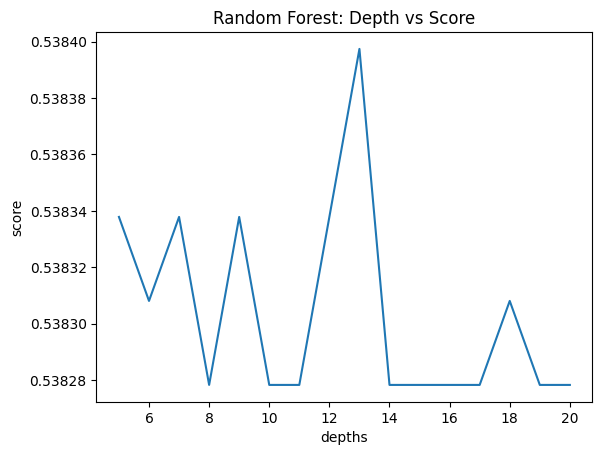

In [43]:
plt.plot(depths, scores)
plt.xlabel("depths")
plt.ylabel("score")
plt.title("Random Forest: Depth vs Score")

In [44]:
estimators = range(50, 110, 10)
scores = []
for x in estimators:
  RFC = RandomForestClassifier(n_estimators=x, max_depth=10).fit(X_train, y_train)
  scores.append(RFC.score(X_test, y_test))

KeyboardInterrupt: ignored

Text(0.5, 1.0, 'Random Forest: Estimators vs Score')

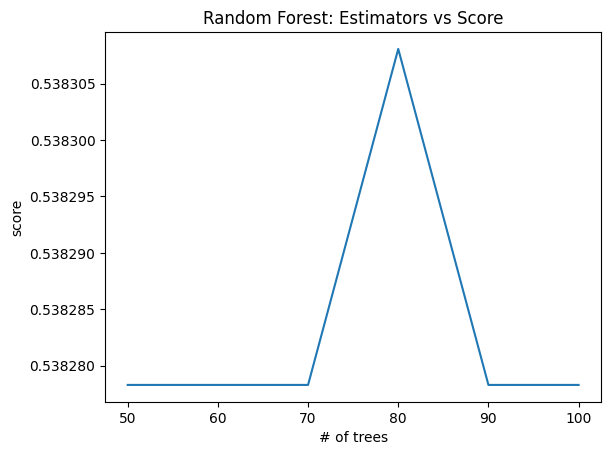

In [41]:
plt.plot(estimators, scores)
plt.xlabel("# of trees")
plt.ylabel("score")
plt.title("Random Forest: Estimators vs Score")

In [46]:
min_splits = range(2, 11, 2)
scores = []
for x in min_splits:
  RFC = RandomForestClassifier(n_estimators=80, max_depth=10, min_samples_split=x).fit(X_train, y_train)
  scores.append(RFC.score(X_test, y_test))

Text(0.5, 1.0, 'Random Forest: Minimum Samples per Leaf vs Score')

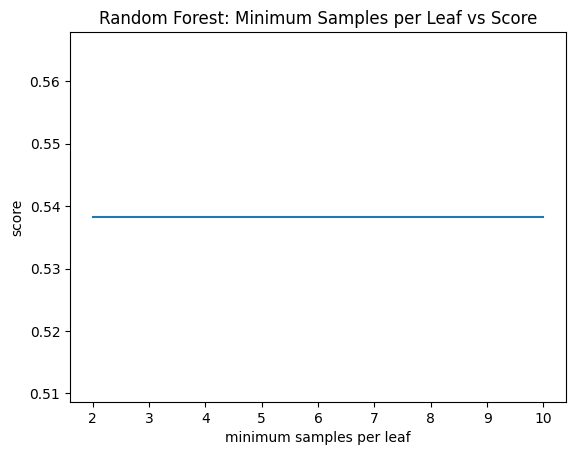

In [48]:
plt.plot(min_splits, scores)
plt.xlabel("minimum samples per leaf")
plt.ylabel("score")
plt.title("Random Forest: Minimum Samples per Leaf vs Score")

In [49]:
RFC = RandomForestClassifier(n_estimators=80, max_depth=10).fit(X_train, y_train)
RFC.score(X_test, y_test)

0.5382782955662091